# Recipe Recommendation System: EDA and Visualization

Author: Kelly Li


## Table of contents:
* [1 Introduction](#one)
* [2 Datasets](#two)
    * [2.1 Data Sources](#twoone)
    * [2.2 Data Loading](#twotwo)
-------------------------------------------------------------------------------------------------------------------------------

## 1 Introduction <a class="anchor" id="one"></a>

## 2 Clean Datasets <a class="anchor" id="two"></a>

### 2.1 Data Sources <a class="anchor" id="twoone"></a>

Here's the data dictionary for the columns in the clean recipe dataset:

| Column Name   | Description                                               |
| ------------- | --------------------------------------------------------- |
| name          | The name of the recipe.                                   |
| id            | The unique identifier of the recipe.                       |
| minutes       | The total cooking and preparation time in minutes.         |
| contributor_id| The unique identifier of the user who submitted the recipe|
| submitted     | The date when the recipe was submitted.                    |
| tags          | Tags or labels associated with the recipe (e.g., vegetarian, vegan, dessert). |
| n_steps       | The total number of steps or instructions in the recipe.   |
| steps         | The step-by-step instructions for preparing the recipe.    |
| description   | A brief description or summary of the recipe.              |
| ingredients   | The list of ingredients required for the recipe.           |
| n_ingredients | The total number of ingredients used in the recipe.        |
| calories      | The total number of calories in the recipe.                |
| total_fat     | The PDV of total fat in the recipe.                        |
| sugar         | The PDV of sugar in the recipe.                            |
| sodium        | The PDV of sodium in the recipe.                           |
| protein       | The PDV of protein in the recipe.                          |
| saturated_fat | The PDV of saturated fat in the recipe.                    |

*PDV = % daily value

Here's the data dictionary for the columns in the clean user interactions dataset:

| Column Name | Description                                          |
| ----------- | ---------------------------------------------------- |
| user_id     | The unique identifier of the user.                    |
| recipe_id   | The unique identifier of the recipe associated with the user's interaction. |
| date        | The date when the user's interaction took place.      |
| rating      | The rating given by the user for the recipe.          |
| review      | The review or feedback provided by the user for the recipe. |

### 2.2 Data Loading <a class="anchor" id="twotwo"></a>

In [53]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [54]:
# Read the clean datasets
recipes_df = pd.read_pickle('clean_recipes.pkl')
users_df = pd.read_pickle('clean_interactions.pkl')
food_df = pd.read_pickle('food.pkl')

In [55]:
recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216818 entries, 0 to 231636
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   name             216818 non-null  object        
 1   id               216818 non-null  object        
 2   minutes          216818 non-null  int64         
 3   contributor_id   216818 non-null  object        
 4   submitted        216818 non-null  datetime64[ns]
 5   tags             216818 non-null  object        
 6   n_steps          216818 non-null  int64         
 7   steps            216818 non-null  object        
 8   description      216818 non-null  object        
 9   ingredients      216818 non-null  object        
 10  n_ingredients    216818 non-null  int64         
 11  calories         216818 non-null  float64       
 12  total_fat        216818 non-null  float64       
 13  sugar            216818 non-null  float64       
 14  sodium           216

In [56]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1071351 entries, 0 to 1132366
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   user_id       1071351 non-null  object        
 1   recipe_id     1071351 non-null  object        
 2   date          1071351 non-null  datetime64[ns]
 3   rating        1071351 non-null  int64         
 4   review        1071351 non-null  object        
 5   review_month  1071351 non-null  object        
 6   review_year   1071351 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 65.4+ MB


In [57]:
# Shape of the data
print('The shape of the recipe dataset is:', recipes_df.shape)
print('The shape of the user interactions dataset is:', users_df.shape)

The shape of the recipe dataset is: (216818, 25)
The shape of the user interactions dataset is: (1071351, 7)


In [58]:
# View recipes dataset
recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,...,protein,saturated_fat,carbohydrates,submitted_month,submitted_year,dairy-free,gluten-free,low-carb,vegan,vegetarian
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",...,2.0,0.0,4.0,Sep,2005,0,0,0,0,1
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",...,22.0,35.0,1.0,Jun,2002,0,0,0,0,0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",...,39.0,27.0,5.0,Feb,2005,0,0,0,0,0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",...,14.0,8.0,20.0,Apr,2003,0,0,0,0,0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",...,3.0,0.0,28.0,Oct,2002,0,0,0,0,1


In [59]:
# View user interactions dataset
users_df.head()

,user_id,recipe_id,date,rating,review,review_month,review_year
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,Feb,2003
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",Dec,2011
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,Dec,2002
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,Feb,2010
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",Oct,2011


In [60]:
recipes_df.describe()

,minutes,n_steps,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,submitted_year,dairy-free,gluten-free,low-carb,vegan,vegetarian
count,216818.000000,216818.000000,216818.000000,216818.000000,216818.000000,216818.000000,216818.000000,216818.000000,216818.000000,216818.000000,216818.000000,216818.000000,216818.000000,216818.000000,216818.000000,216818.000000
mean,117.722449,8.960179,8.880508,460.648451,35.041574,81.577881,29.633674,33.973784,43.986952,15.067278,2006.465307,0.000862,0.024869,0.185151,0.044406,0.155965
std,1951.118648,4.461852,3.603727,1194.774267,76.532522,818.236742,131.785991,57.041227,94.136496,83.432637,2.913345,0.029355,0.155726,0.388421,0.205996,0.362823
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,6.000000,6.000000,171.700000,8.000000,9.000000,5.000000,6.000000,7.000000,4.000000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,8.000000,9.000000,307.800000,20.000000,24.000000,14.000000,18.000000,22.000000,9.000000,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,65.000000,12.000000,11.000000,509.200000,40.000000,66.000000,32.000000,50.000000,51.000000,16.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,288000.000000,21.000000,43.000000,434360.200000,17183.000000,362729.000000,29338.000000,6552.000000,10395.000000,36098.000000,2018.000000,1.000000,1.000000,1.000000,1.000000,1.000000


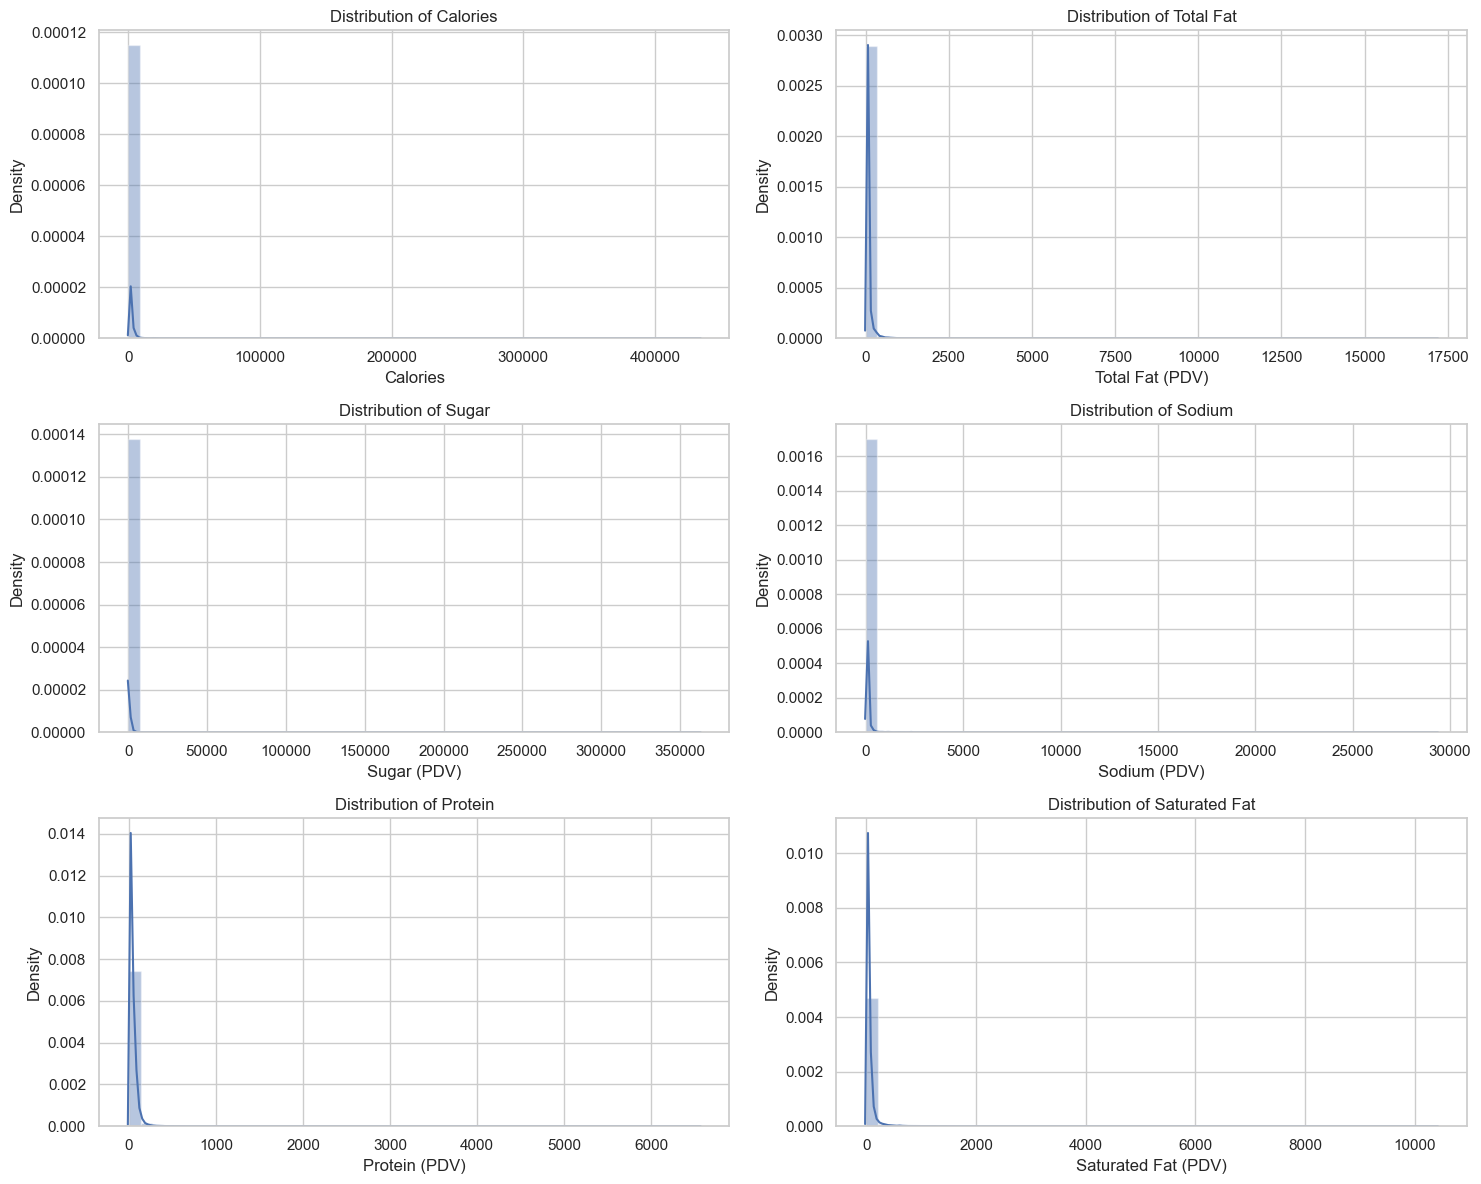

In [61]:
# Create a figure with six subplots in a 3x2 grid
fig, ax = plt.subplots(3, 2, figsize=(15, 12))

# Plot distribution of 'calories' on the first subplot
sns.distplot(recipes_df["calories"], ax=ax[0, 0])
ax[0, 0].set_xlabel('Calories')
ax[0, 0].set_ylabel('Density')
ax[0, 0].set_title('Distribution of Calories')

# Plot distribution of 'total_fat' on the second subplot
sns.distplot(recipes_df["total_fat"], ax=ax[0, 1])
ax[0, 1].set_xlabel('Total Fat (PDV)')
ax[0, 1].set_ylabel('Density')
ax[0, 1].set_title('Distribution of Total Fat')

# Plot distribution of 'sugar' on the third subplot
sns.distplot(recipes_df["sugar"], ax=ax[1, 0])
ax[1, 0].set_xlabel('Sugar (PDV)')
ax[1, 0].set_ylabel('Density')
ax[1, 0].set_title('Distribution of Sugar')

# Plot distribution of 'sodium' on the fourth subplot
sns.distplot(recipes_df["sodium"], ax=ax[1, 1])
ax[1, 1].set_xlabel('Sodium (PDV)')
ax[1, 1].set_ylabel('Density')
ax[1, 1].set_title('Distribution of Sodium')

# Plot distribution of 'protein' on the fifth subplot
sns.distplot(recipes_df["protein"], ax=ax[2, 0])
ax[2, 0].set_xlabel('Protein (PDV)')
ax[2, 0].set_ylabel('Density')
ax[2, 0].set_title('Distribution of Protein')

# Plot distribution of 'saturated_fat' on the sixth subplot
sns.distplot(recipes_df["saturated_fat"], ax=ax[2, 1])
ax[2, 1].set_xlabel('Saturated Fat (PDV)')
ax[2, 1].set_ylabel('Density')
ax[2, 1].set_title('Distribution of Saturated Fat')

plt.tight_layout()
plt.show()


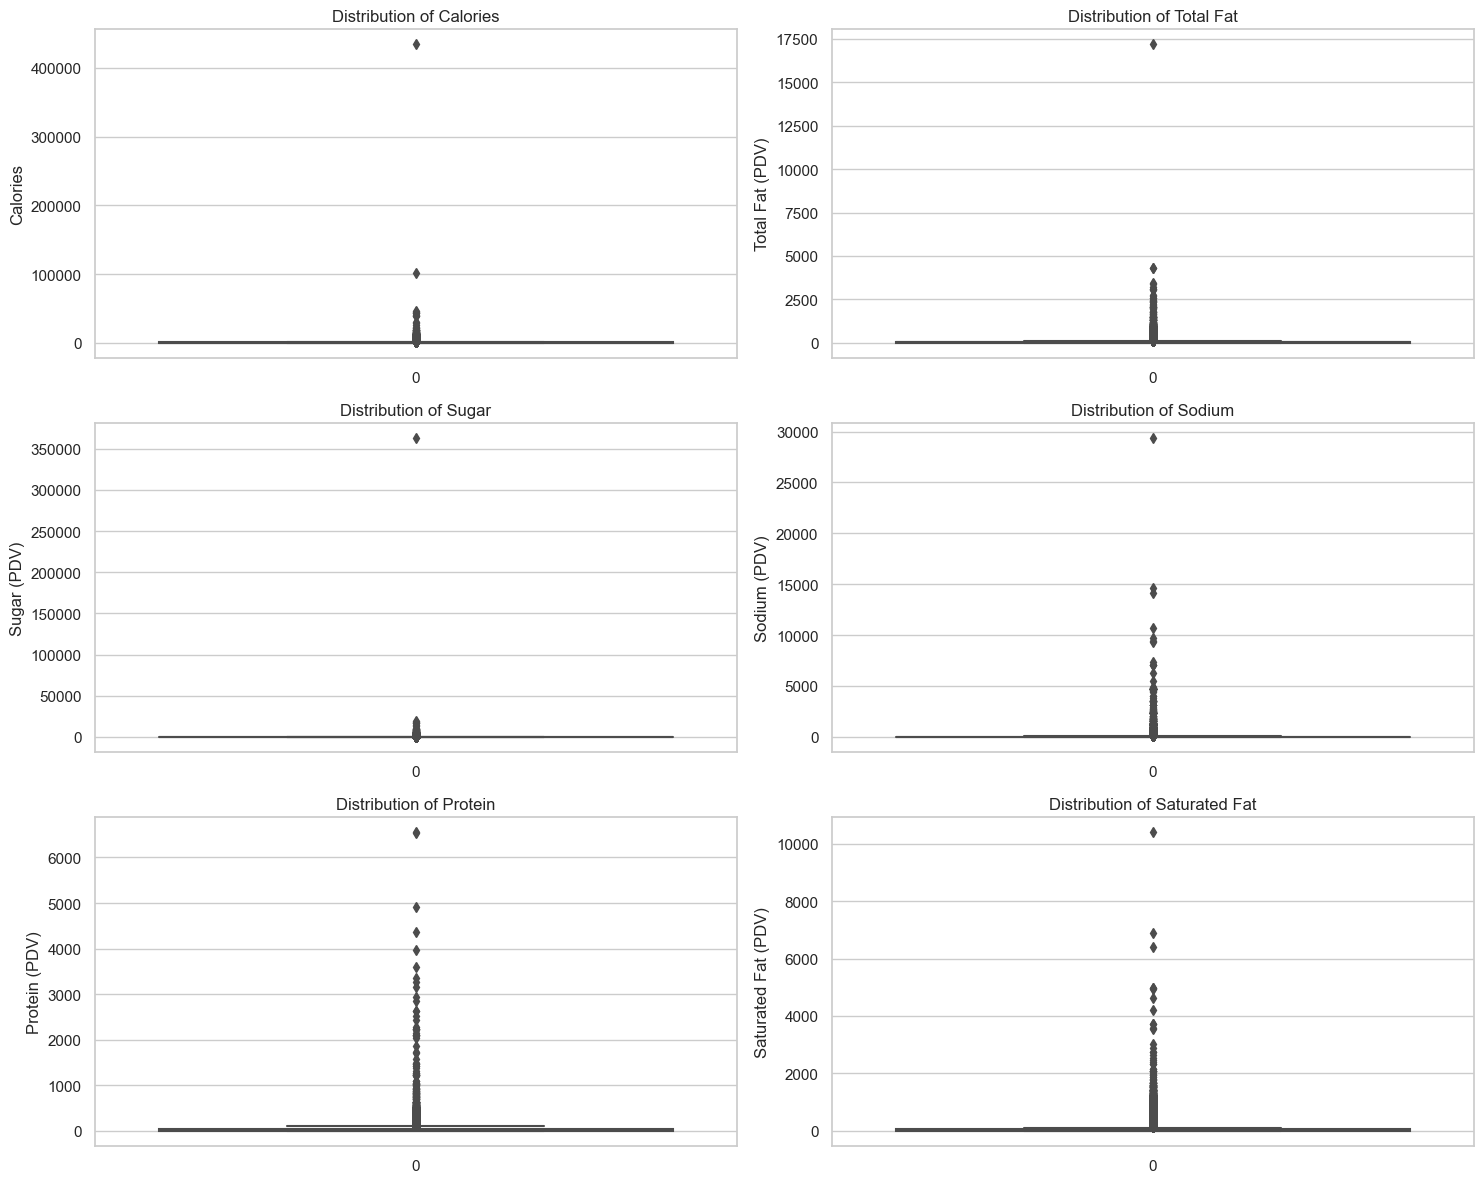

In [62]:
# Create a figure with six subplots in a 3x2 grid
fig, ax = plt.subplots(3, 2, figsize=(15, 12))

# Plot boxplot of 'calories' on the first subplot
sns.boxplot(data=recipes_df["calories"], ax=ax[0, 0])
ax[0, 0].set_ylabel('Calories')
ax[0, 0].set_title('Distribution of Calories')

# Plot boxplot of 'total_fat' on the second subplot
sns.boxplot(data=recipes_df["total_fat"], ax=ax[0, 1])
ax[0, 1].set_ylabel('Total Fat (PDV)')
ax[0, 1].set_title('Distribution of Total Fat')

# Plot boxplot of 'sugar' on the third subplot
sns.boxplot(data=recipes_df["sugar"], ax=ax[1, 0])
ax[1, 0].set_ylabel('Sugar (PDV)')
ax[1, 0].set_title('Distribution of Sugar')

# Plot boxplot of 'sodium' on the fourth subplot
sns.boxplot(data=recipes_df["sodium"], ax=ax[1, 1])
ax[1, 1].set_ylabel('Sodium (PDV)')
ax[1, 1].set_title('Distribution of Sodium')

# Plot boxplot of 'protein' on the fifth subplot
sns.boxplot(data=recipes_df["protein"], ax=ax[2, 0])
ax[2, 0].set_ylabel('Protein (PDV)')
ax[2, 0].set_title('Distribution of Protein')

# Plot boxplot of 'saturated_fat' on the sixth subplot
sns.boxplot(data=recipes_df["saturated_fat"], ax=ax[2, 1])
ax[2, 1].set_ylabel('Saturated Fat (PDV)')
ax[2, 1].set_title('Distribution of Saturated Fat')

plt.tight_layout()
plt.show()


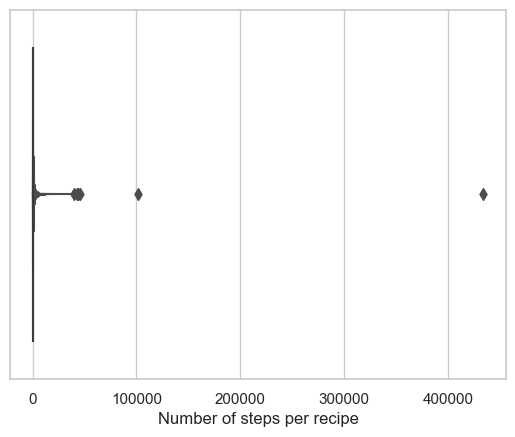

In [63]:
# Visualize boxen plot
sns.set(style = "whitegrid")
ax = sns.boxenplot(x = recipes_df['calories'])
ax.set_xlabel('Number of steps per recipe')
plt.show()

In [64]:
# Calories
# Calculate the first quartile, third quartile and the interquartile range
Q1 = recipes_df['calories'].quantile(0.25)
Q3 = recipes_df['calories'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the maximum value and minimum values according to the Tukey rule
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# Filter the data for values that are greater than max_value or less than min_value
minutes_outliers = recipes_df[(recipes_df['calories'] > max_value) | (recipes_df['calories'] < min_value)]
minutes_outliers[['name','calories']].sort_values('calories')

,name,calories
151941,pan fried potatoes with bacon and parmesan,1015.5
167243,pumpkin pie cheesecake,1015.5
199149,steak au poivre steaks with crushed peppercorns,1015.5
99974,grilled steak with bourbon sauce,1015.5
89940,garlic and parmesan shrimp farfalle,1015.6
...,...,...
34023,caledonian wedding cake,43924.6
137181,mmmmmmmmilky way cake,44239.8
165504,powdered hot cocoa mix,45609.0
70467,deep fried prime rib,101614.7


The two outliers: https://www.food.com/recipe/tennessee-moonshine-193435 https://www.food.com/recipe/deep-fried-prime-rib-227470

In [65]:
# Remove row
recipes_df = recipes_df[~recipes_df['id'].isin(['193435', '227470'])]

# View dataset
recipes_df.sort_values('calories', ascending=True).tail(5)

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,...,protein,saturated_fat,carbohydrates,submitted_month,submitted_year,dairy-free,gluten-free,low-carb,vegan,vegetarian
78689,easy easy friendship cake,48363,75,6258,2002-12-11,"['weeknight', 'time-to-make', 'course', 'main-...",7,['place all cake ingredients in a mixing bowl'...,it is simple and sweet. the original direction...,"['duncan hines butter cake mix', 'instant vani...",...,810.0,1084.0,2275.0,Dec,2002,0,0,0,0,0
141997,my mercy strawberry cake,75591,60,30680,2003-11-05,"['60-minutes-or-less', 'time-to-make', 'course...",11,['strawberry cake directions: mix all together...,this cake came from my grandmother's best frie...,"['duncan hines butter cake mix', 'crisco cooki...",...,886.0,2155.0,2315.0,Nov,2003,0,0,0,0,0
34023,caledonian wedding cake,18330,630,123897,2002-01-28,"['weeknight', 'time-to-make', 'course', 'main-...",3,"['bake 10 hours in a slow oven', 'one-quarter ...","found in old british cookbook, don't expect an...","['raisins', 'currants', 'figs', 'sweet almonds...",...,1103.0,4941.0,2233.0,Jan,2002,0,0,0,0,0
137181,mmmmmmmmilky way cake,82848,60,4439,2004-02-02,"['60-minutes-or-less', 'time-to-make', 'course...",14,"['preheat oven to 350 degrees fahrenheit', 'gr...","this is not a true chocolate cake, but really ...","['yellow cake mix', 'butter', 'water', 'eggs',...",...,936.0,1441.0,2565.0,Feb,2004,0,0,0,0,0
165504,powdered hot cocoa mix,392286,10,180317,2009-09-28,"['15-minutes-or-less', 'time-to-make', 'course...",4,['mix all ingredients together in an airtight ...,our family grew up on this cocoa mix. we neve...,"['dry milk', 'nestles quik', 'powdered sugar',...",...,4356.0,6875.0,1453.0,Sep,2009,0,0,0,0,0


<Axes: >

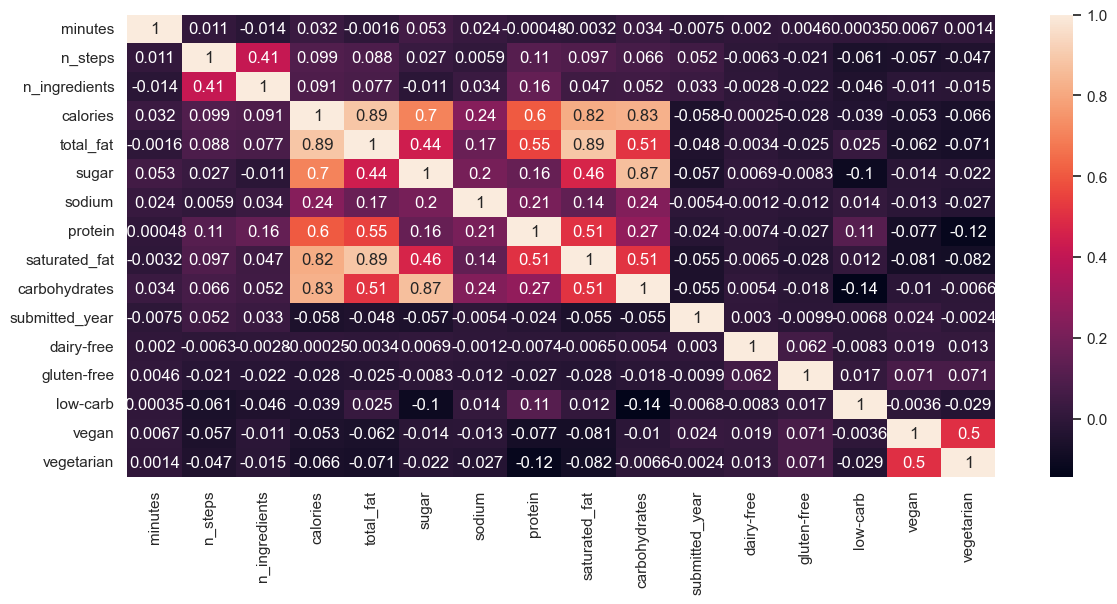

In [66]:
plt.figure(figsize=(14,6))
sns.heatmap(recipes_df.corr(),annot=True)

<Axes: >

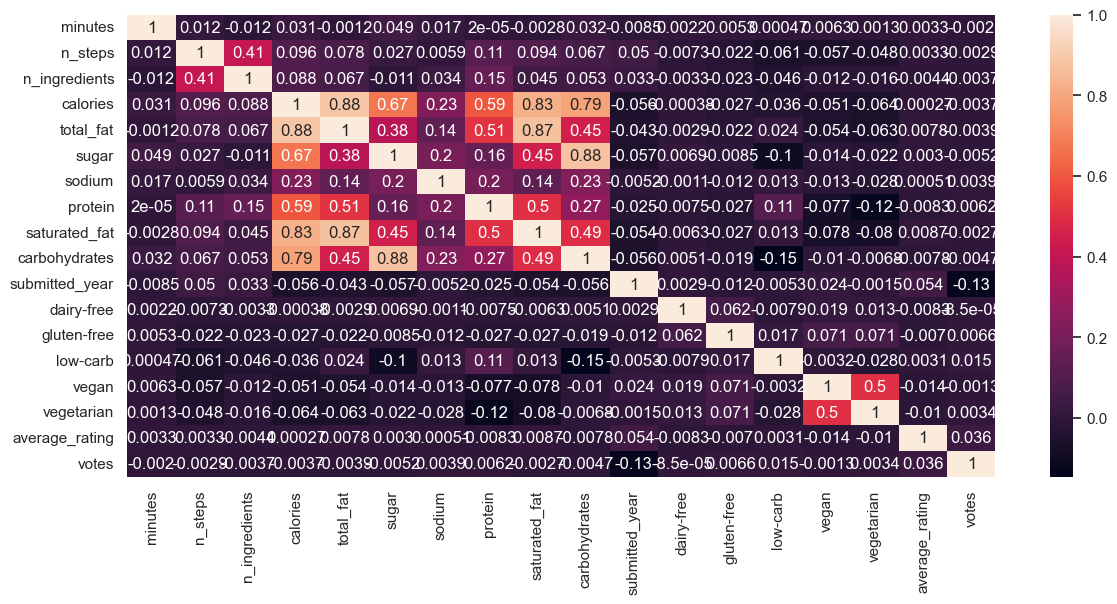

In [67]:
plt.figure(figsize=(14,6))
sns.heatmap(food_df.corr(),annot=True)

In [68]:
users_df['rating'].value_counts()

5    816229
4    187333
3     40852
2     14122
1     12815
Name: rating, dtype: int64

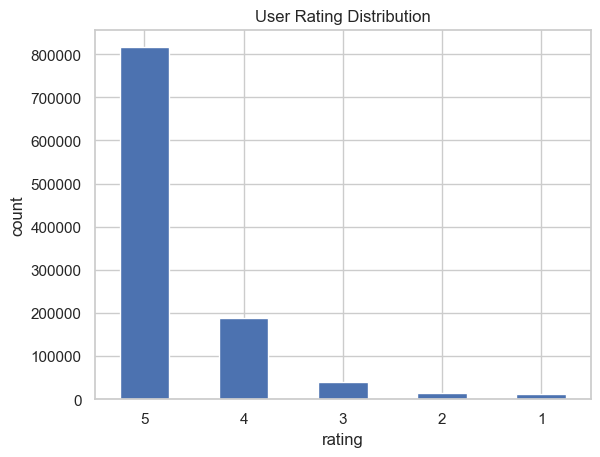

In [69]:
users_df['rating'].value_counts().plot(kind="bar")
plt.xlabel('rating')
plt.ylabel('count')
plt.title('User Rating Distribution')
plt.xticks(rotation=0)
plt.show()

Users consistently provide high ratings for recipes on food.com. While this might suggest universal satisfaction with the recipes, it is important to consider alternative explanations. It is more likely that users who are dissatisfied with a recipe are less inclined to leave a rating, or they attribute any unfavorable outcomes to their own cooking skills rather than the recipe itself. This phenomenon could result in a positive bias in the ratings, as users tend to give recipe authors the benefit of the doubt. Therefore, while high ratings indicate overall positive feedback, it is essential to interpret them within the context of potential rating bias and user behavior.

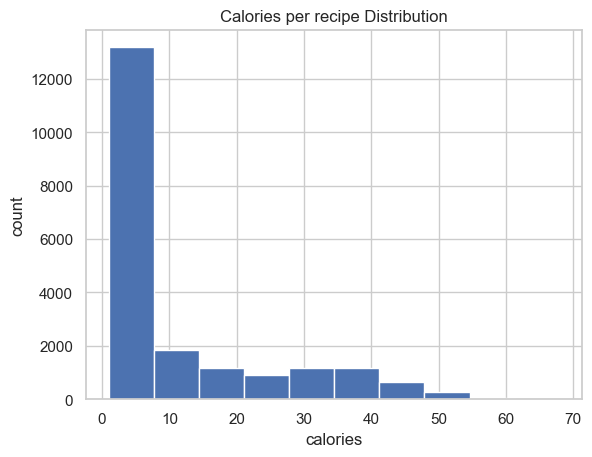

In [70]:
recipes_df['calories'].value_counts().plot(kind="hist")
plt.xlabel('calories')
plt.ylabel('count')
plt.title('Calories per recipe Distribution')
plt.xticks(rotation=0)
plt.show()

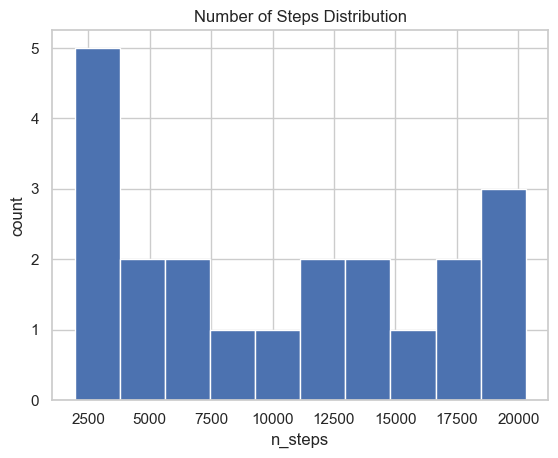

In [71]:
recipes_df['n_steps'].value_counts().plot(kind="hist")
plt.xlabel('n_steps')
plt.ylabel('count')
plt.title('Number of Steps Distribution')
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='n_ingredients', ylabel='minutes'>

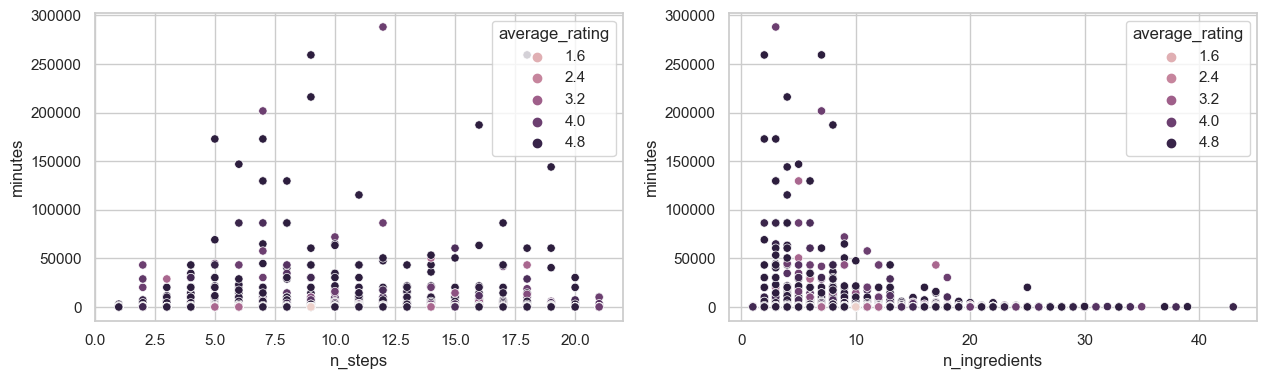

In [72]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
sns.scatterplot(data=food_df,x="n_steps",y="minutes" ,hue="average_rating",ax=ax[0])
sns.scatterplot(data=food_df,x="n_ingredients",y="minutes" ,hue="average_rating",ax=ax[1])

<Axes: xlabel='carbohydrates', ylabel='sugar'>

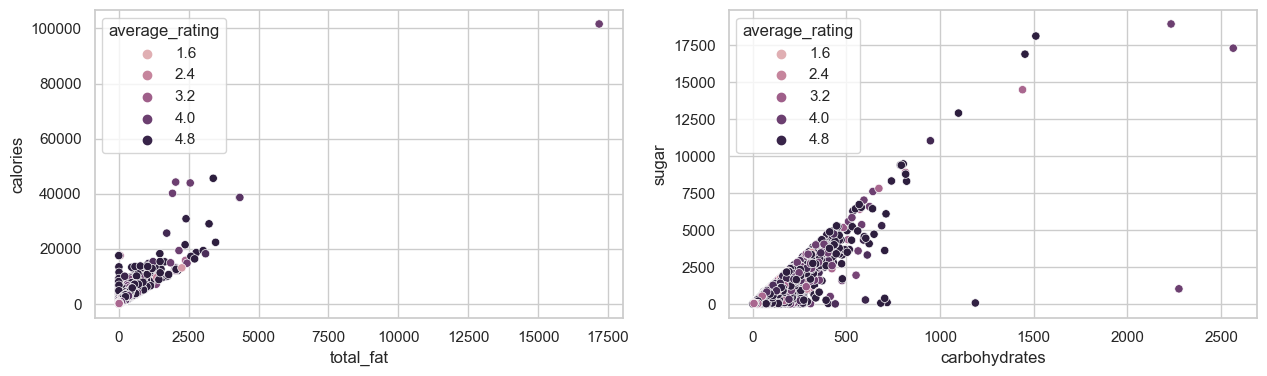

In [73]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
sns.scatterplot(data=food_df,x="total_fat",y="calories" ,hue="average_rating",ax=ax[0])
sns.scatterplot(data=food_df,x="carbohydrates",y="sugar" ,hue="average_rating",ax=ax[1])